In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
import neural_process
from gp_curves import GPCurvesGenerator, plot_func


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
TRAINING_ITERATIONS = int(1e5)
MAX_CONTEXT_POINTS = 10
PLOT_AFTER = int(1e4)

In [4]:
dataset_train = GPCurvesGenerator(batch_size=64, max_size=MAX_CONTEXT_POINTS)
data_train = dataset_train.generate()

In [5]:
dataset_test = GPCurvesGenerator(batch_size=1, max_size=MAX_CONTEXT_POINTS, testing=True)
data_test = dataset_test.generate()

In [6]:
encoder_output_sizes = [128, 128, 128, 128]
decoder_output_sizes = [128, 128, 1]

model = neural_process.ConditionalNP(encoder_output_sizes, decoder_output_sizes)

loss = model.loss(data_train.context,
                  data_train.query,
                  data_train.target)

_, mu, sigma = model(data_test.context, data_test.query)

opt = tf.train.AdamOptimizer(1e-4).minimize(loss)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Iteration: 0, loss: 1.1044739484786987


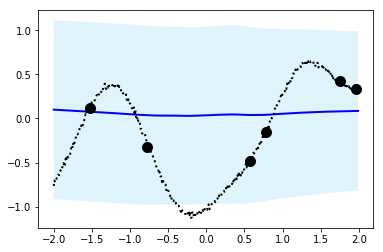

Iteration: 10000, loss: 0.367779940366745


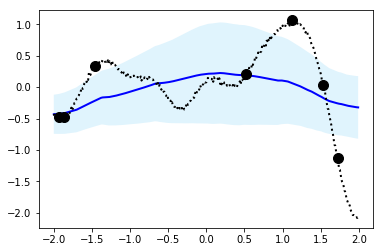

Iteration: 20000, loss: 0.11735866963863373


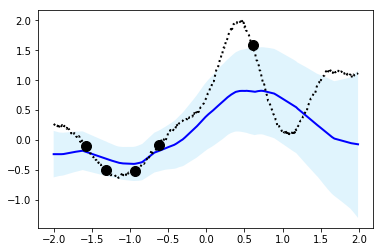

Iteration: 30000, loss: 0.24683280289173126


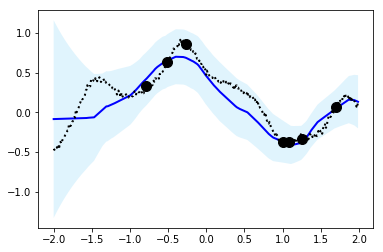

Iteration: 40000, loss: 0.007863334380090237


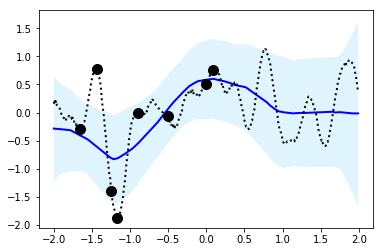

Iteration: 50000, loss: 0.07837435603141785


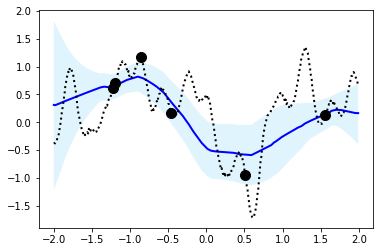

Iteration: 60000, loss: -0.03999265283346176


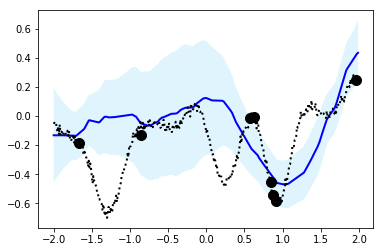

Iteration: 70000, loss: -0.11792904883623123


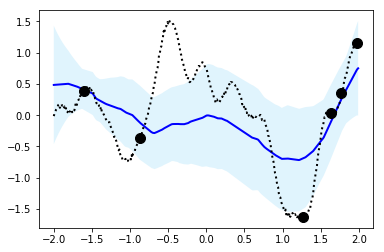

Iteration: 80000, loss: 0.32749515771865845


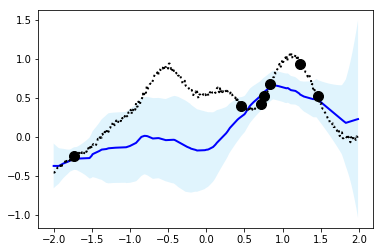

Iteration: 90000, loss: -0.1013147234916687


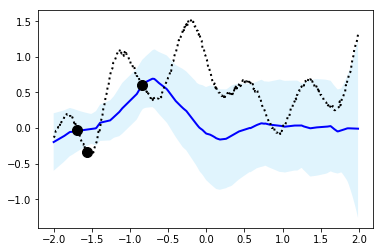

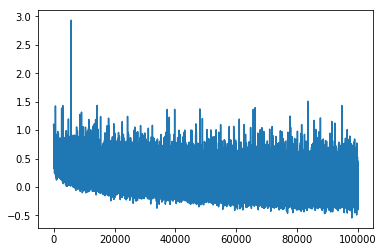

In [7]:
loss_graph = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(TRAINING_ITERATIONS):
        _, l = sess.run([opt, loss])
        loss_graph.append(l)

        if i % PLOT_AFTER == 0:
            context, query, target, loss_v, pred, var = sess.run([data_test.context,
                                                                  data_test.query,
                                                                  data_test.target,
                                                                  loss, mu, sigma])
            cx, cy = context
            print('Iteration: {}, loss: {}'.format(i, loss_v))

            plot_func(query, target, cx, cy, pred, var)

plt.plot(loss_graph)

In [8]:
z_output_sizes = [128, 128, 128, 128]
enc_output_sizes = [128, 128, 128, 128]
dec_output_sizes = [128, 128, 1]

model = neural_process.NeuralProcess(z_output_sizes, enc_output_sizes, dec_output_sizes)

loss = model.loss(data_train.context,
                  data_train.query,
                  data_train.target)

_, mu, sigma = model(data_test.context, data_test.query)

opt = tf.train.AdamOptimizer(1e-4).minimize(loss)

Iteration: 0, loss: 1952.989501953125


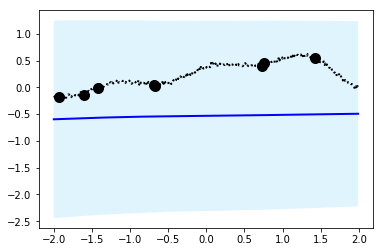

Iteration: 10000, loss: 605.4371948242188


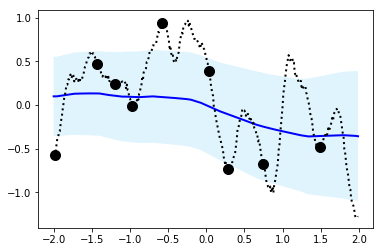

Iteration: 20000, loss: 39.61954879760742


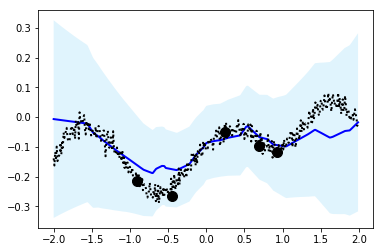

Iteration: 30000, loss: 127.04705810546875


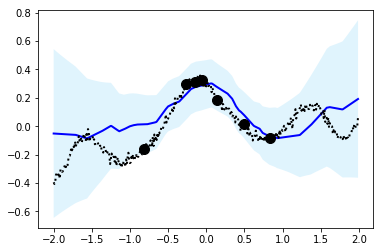

Iteration: 40000, loss: 20.40338134765625


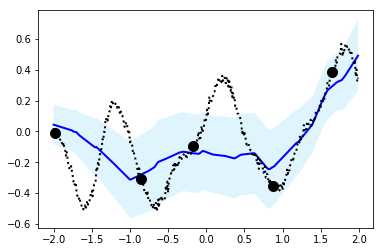

Iteration: 50000, loss: -99.37581634521484


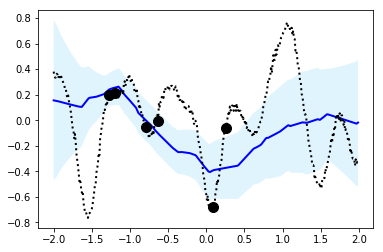

Iteration: 60000, loss: -25.5761661529541


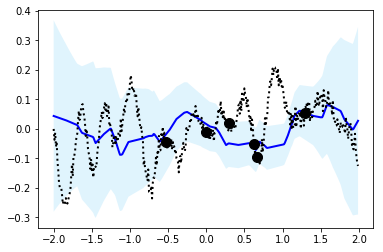

Iteration: 70000, loss: -43.41876983642578


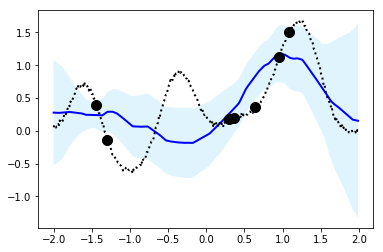

Iteration: 80000, loss: -69.83836364746094


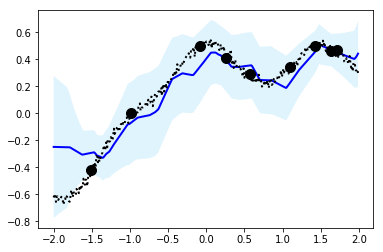

Iteration: 90000, loss: 390.3404846191406


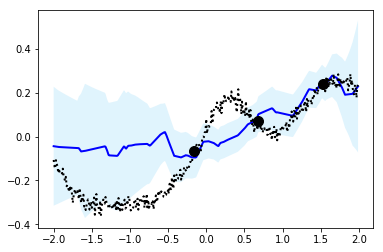

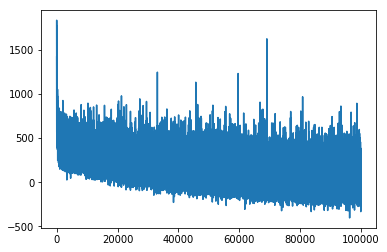

In [ ]:
loss_graph = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(TRAINING_ITERATIONS):
        _, l = sess.run([opt, loss])
        loss_graph.append(l)

        if i % PLOT_AFTER == 0:
            context, query, target, loss_v, pred, var = sess.run([data_test.context,
                                                                  data_test.query,
                                                                  data_test.target,
                                                                  loss, mu, sigma])
            cx, cy = context
            print('Iteration: {}, loss: {}'.format(i, loss_v))

            plot_func(query, target, cx, cy, pred, var)

plt.plot(loss_graph)

In [ ]:
z_output_sizes = [128, 128, 128, 128]
enc_output_sizes = [128, 128, 128, 128]
cross_output_sizes = [128, 128, 128, 128]
dec_output_sizes = [128, 128, 1]

self_attention = neural_process.Attention(rep='mlp', attention_type='multihead', output_sizes=[128, 128])
cross_attention = neural_process.Attention(rep='mlp', attention_type='multihead', output_sizes=[128, 128])

model = neural_process.AttentiveNP(z_output_sizes,
                                   enc_output_sizes,
                                   cross_output_sizes,
                                   dec_output_sizes,
                                   self_attention,
                                   cross_attention)

loss = model.loss(data_train.context,
                  data_train.query,
                  data_train.target)

_, mu, sigma = model(data_test.context, data_test.query)

opt = tf.train.AdamOptimizer(1e-4).minimize(loss)

Iteration: 0, loss: 7544.35498046875


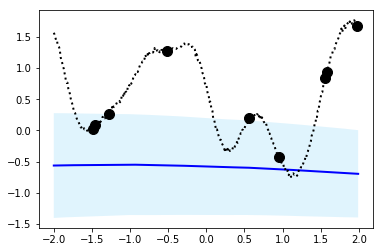

Iteration: 10000, loss: 142.129150390625


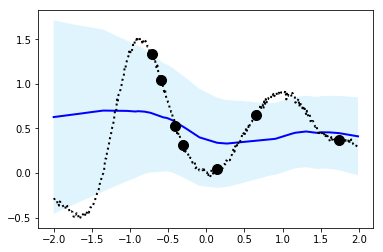

Iteration: 20000, loss: 166.48165893554688


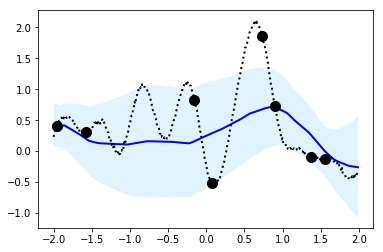

Iteration: 30000, loss: -202.48751831054688


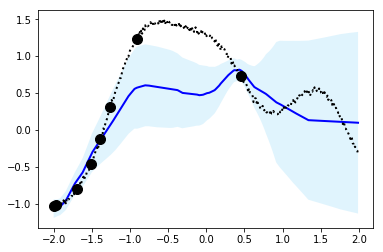

Iteration: 40000, loss: -201.9420623779297


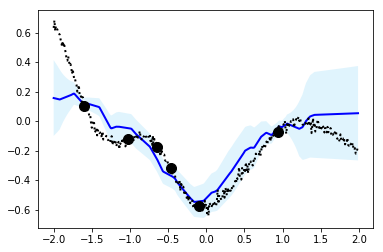

In [ ]:
loss_graph = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(TRAINING_ITERATIONS):
        _, l = sess.run([opt, loss])
        loss_graph.append(l)

        if i % PLOT_AFTER == 0:
            context, query, target, loss_v, pred, var = sess.run([data_test.context,
                                                                  data_test.query,
                                                                  data_test.target,
                                                                  loss, mu, sigma])
            cx, cy = context
            print('Iteration: {}, loss: {}'.format(i, loss_v))

            plot_func(query, target, cx, cy, pred, var)

plt.plot(loss_graph)